## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

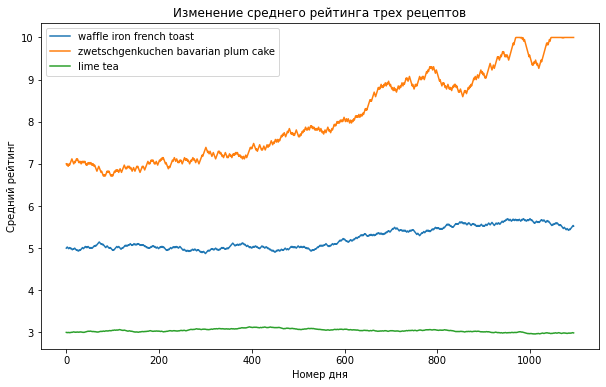

In [32]:
ar = np.load('C:\\Users\\1\\Downloads\\05_graphics\\data\\average_ratings.npy')

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ar[0], label='waffle iron french toast')
ax.plot(ar[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(ar[2], label='lime tea')

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

ax.legend()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


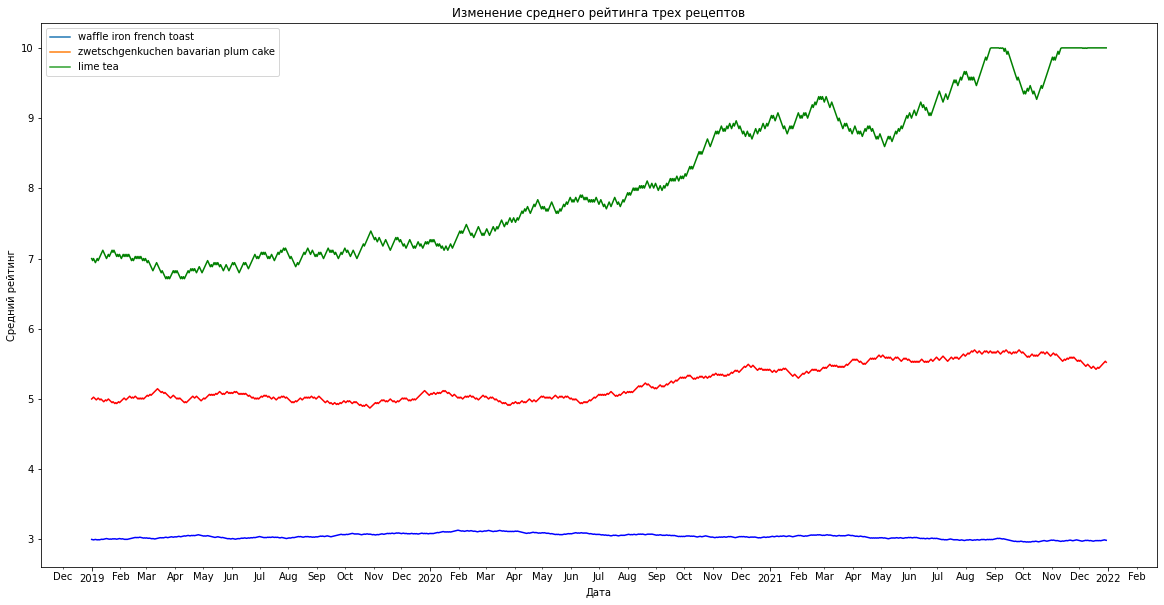

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))


dates = pd.date_range(start='2019-01-01', end='2021-12-30')

ax.plot(dates, ar[0], label='waffle iron french toast')
ax.plot(dates, ar[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(dates, ar[2], label='lime tea')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.legend()

ax.get_lines()[0].set_color('red')
ax.get_lines()[1].set_color('green')
ax.get_lines()[2].set_color('blue')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0.5, 0.98, 'Изменение среднего рейтинга трех рецептов')

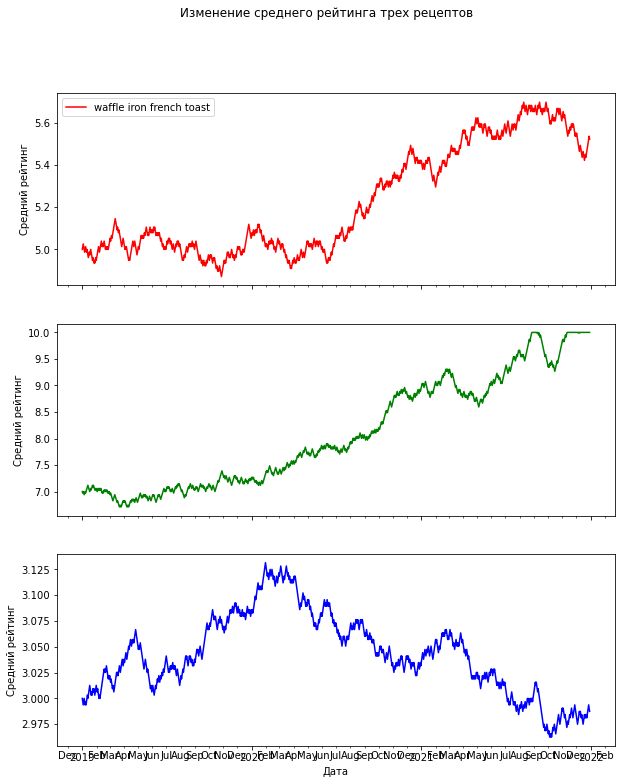

In [41]:
ar = np.load('C:\\Users\\1\\Downloads\\05_graphics\\data\\average_ratings.npy')
fig, axs = plt.subplots(3, 1, figsize=(10,12), sharex=True)
dates = pd.date_range(start='2019-01-01', end='2021-12-30')

axs[0].plot(dates, ar[0], label='waffle iron french toast', color='red')
axs[1].plot(dates, ar[1], label='zwetschgenkuchen bavarian plum cake', color='green')
axs[2].plot(dates, ar[2], label='lime tea', color='blue')

for ax in axs:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax.set_ylabel('Средний рейтинг')

axs[-1].set_xlabel('Дата')
axs[0].legend()

fig.suptitle('Изменение среднего рейтинга трех рецептов')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


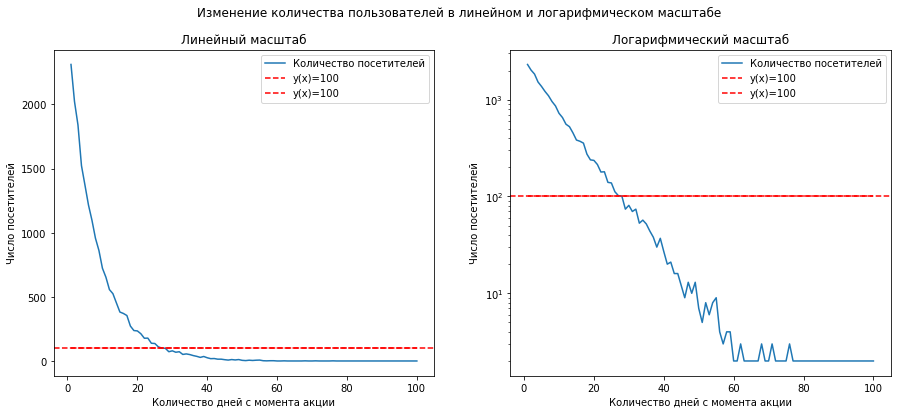

In [44]:
vis = np.load('C:\\Users\\1\\Downloads\\05_graphics\\data\\visitors.npy')
fig, axs = plt.subplots(1, 2, figsize=(15,6))
days = np.arange(1,101)

lmbda = 0.05
y = lmbda * np.exp(-lmbda * days)

axs[0].plot(days, vis, label='Количество посетителей')
axs[0].plot(days, np.full_like(days, 100), 'r--', label='y(x)=100')
axs[0].set_xlabel('Количество дней с момента акции')
axs[0].set_ylabel('Число посетителей')
axs[0].set_title('Линейный масштаб')
axs[0].legend()

axs[1].plot(days, vis, label='Количество посетителей')
axs[1].plot(days, np.full_like(days, 100), 'r--', label='y(x)=100')
axs[1].set_xlabel('Количество дней с момента акции')
axs[1].set_ylabel('Число посетителей')
axs[1].set_title('Логарифмический масштаб')
axs[1].set_yscale('log')
axs[1].legend()

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

for ax in axs:
    ax.axhline(y=100, color='red', linestyle='--', label='y(x)=100')
    ax.legend()

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [46]:
reviews = pd.read_csv('C:\\Users\\1\\Downloads\\05_graphics\\data\\reviews_sample.csv')
recipes = pd.read_csv('C:\\Users\\1\\Downloads\\05_graphics\\data\\recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

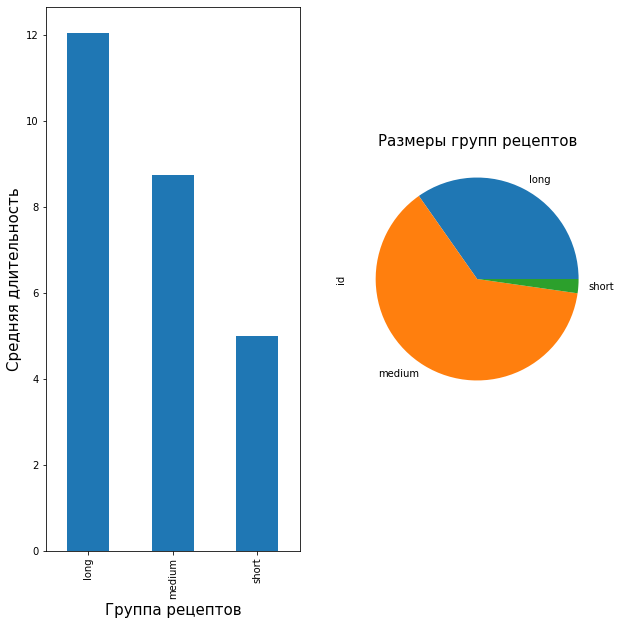

In [57]:
def time(i):
    if i < 5:
        return 'short'
    elif 5 <= i <= 50:
        return 'medium'
    elif i >= 50: 
        return 'long'
    
recipes['duration'] = recipes.apply(duration, axis = 1)
recipes['col'] = recipes['minutes'].apply(time)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))

recipes.groupby('col').mean()['n_steps'].plot.bar(ax = ax1)
recipes.groupby('col').count()['id'].plot.pie(ax = ax2)

ax1.set_xlabel('Группа рецептов', fontsize = 15)
ax1.set_ylabel('Средняя длительность', fontsize = 15)
ax2.set_title('Размеры групп рецептов', fontsize = 15)

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

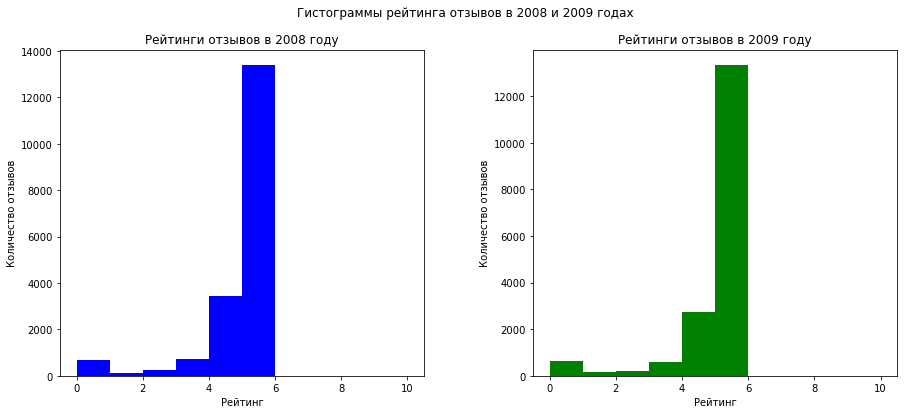

In [63]:
import datetime

reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')
reviews = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

fig, axs = plt.subplots(1, 2, figsize=(15,6))
reviews[reviews['date'].dt.year == 2008]['rating'].plot.hist(ax=axs[0], bins=range(11), color='blue')
axs[0].set_xlabel('Рейтинг')
axs[0].set_ylabel('Количество отзывов')
axs[0].set_title('Рейтинги отзывов в 2008 году')

reviews[reviews['date'].dt.year == 2009]['rating'].plot.hist(ax=axs[1], bins=range(11), color='green')
axs[1].set_xlabel('Рейтинг')
axs[1].set_ylabel('Количество отзывов')
axs[1].set_title('Рейтинги отзывов в 2009 году')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
plt.subplots_adjust(wspace=0.3)
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

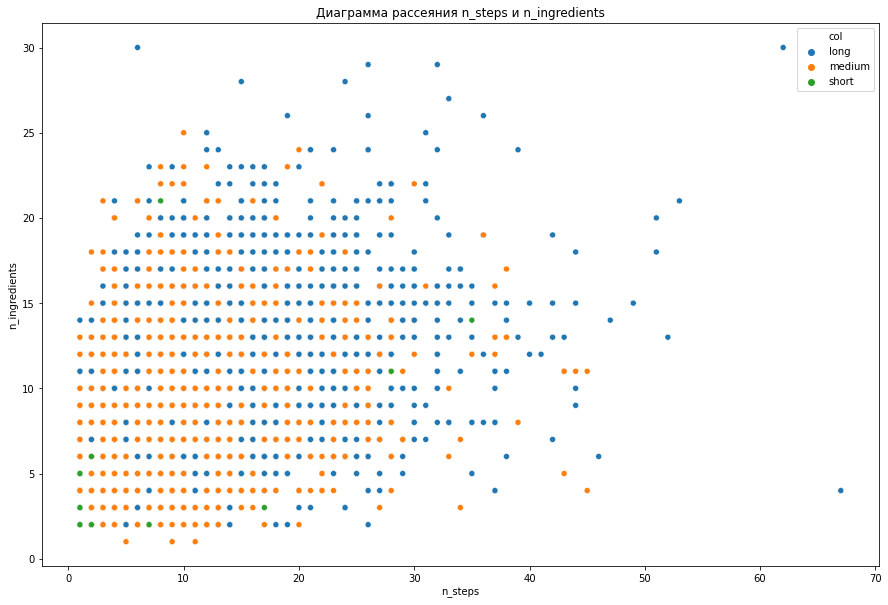

In [66]:
import seaborn as sns

fig, axs = plt.subplots(figsize = (15,10))
sns.scatterplot(data = recipes, x = 'n_steps', y = 'n_ingredients', hue = 'col')
axs.set_title('Диаграмма рассеяния n_steps и n_ingredients')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"